# PyPlot Zoo
A simple zoo of examples for PyPlot, since since the official documentation is frustrating at best.

* [Cmaps](#Cmap-availables)
* [Matrices](#Matrices)
* [Histogram](#Histogram)
* [3d functions](#3d-functions)
* [Contours](#Contours)
* [Subplots](#Subplots)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Used for 3D plots

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 15)

## Cmap availables

In [2]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]
rmaps = [c for e in cmaps for c in e[1] ]

In [3]:
gradient = np.linspace(0, 1, 256)
gradient = np.tile(gradient, 5).reshape(5, 256)

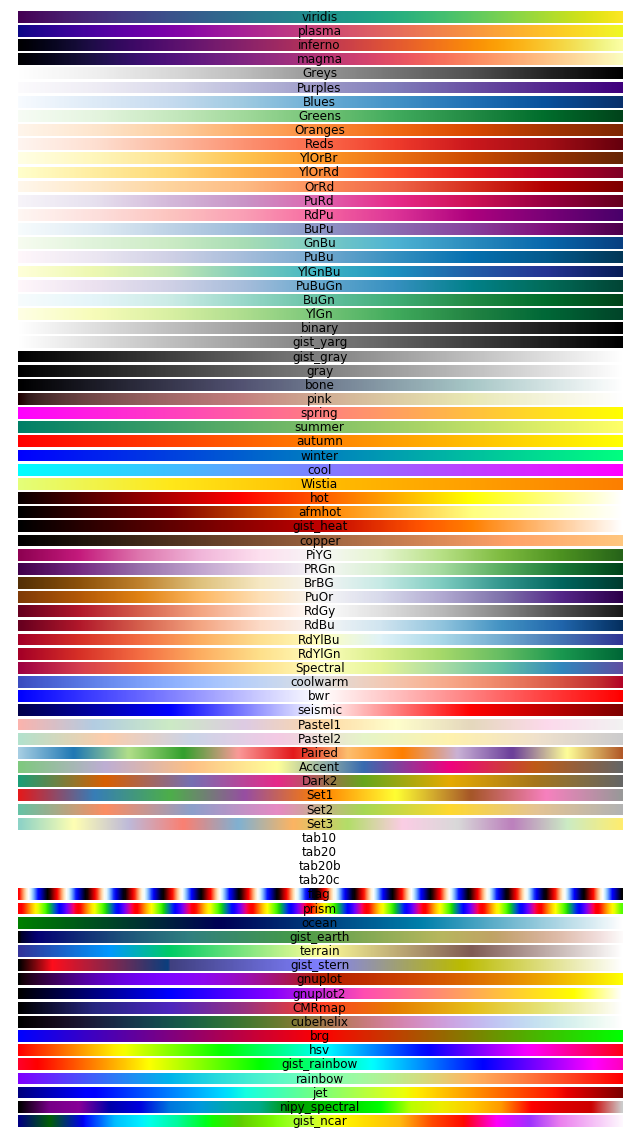

In [4]:
_, axes = plt.subplots(nrows=len(rmaps), ncols=1, figsize = (30,20))

for axe,cmap in zip(axes, rmaps):
    try:
        axe.set_title(cmap, y=-.25)
        axe.set_axis_off()
        axe.imshow(gradient, cmap=cmap)
    except ValueError:
        pass

## Matrices

In [5]:
x = np.linspace(0, 17, 10)
y = np.linspace(0, 20, 20)

X, Y = np.meshgrid(x, y)
Z = X * Y

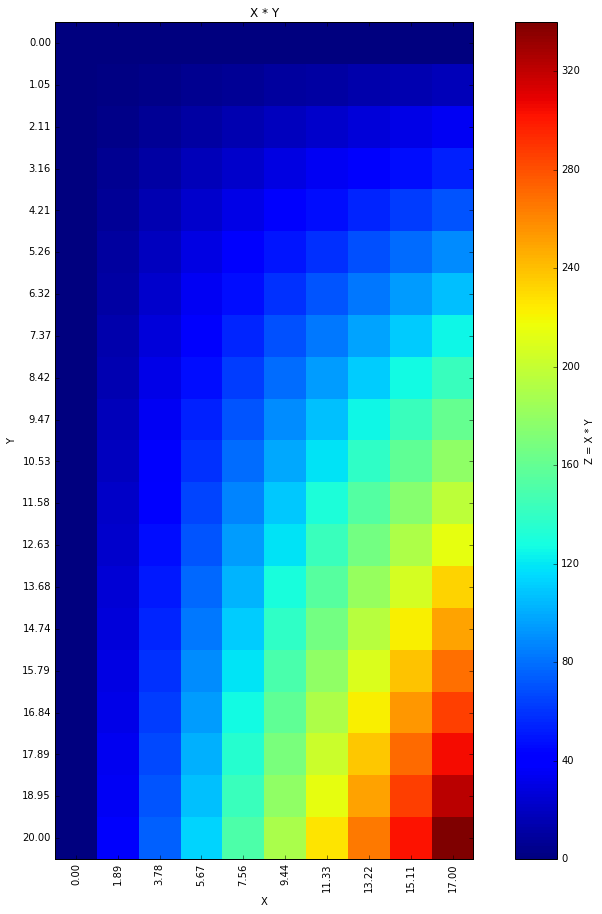

In [6]:
plt.imshow(Z, interpolation='None', cmap='jet')
plt.title("X * Y")
plt.xticks(range(len(x)), ["{:.2f}".format(e) for e in x], rotation=90)
plt.xlabel("X")
plt.yticks(range(len(y)), ["{:.2f}".format(e) for e in y])
plt.ylabel("Y")

c = plt.colorbar()
c.set_label("Z = X * Y")

## Histogram

In [7]:
import random
random.seed(0)
v = [sum((random.choice([-1,1]) for _ in range(100))) for _ in range(1000)]

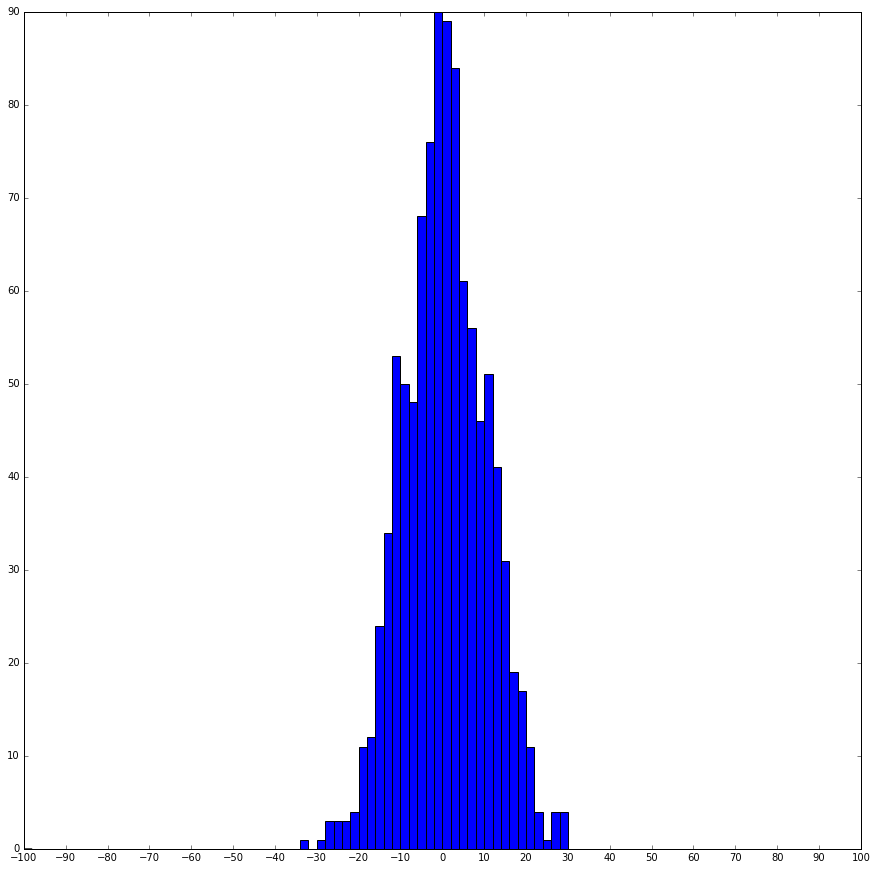

In [8]:
_, _, _ = plt.hist(v, bins=100, range=(-100,100))
plt.xscale('linear')
_ = plt.xticks(range(-100,101, 10))

### Multiple histograms

In [9]:
random.seed(0)
a = [sum((random.choice([-1,1]) for _ in range(100))) for _ in range(1000)]
b = [random.randint(-100,100) for _ in range(1000)]

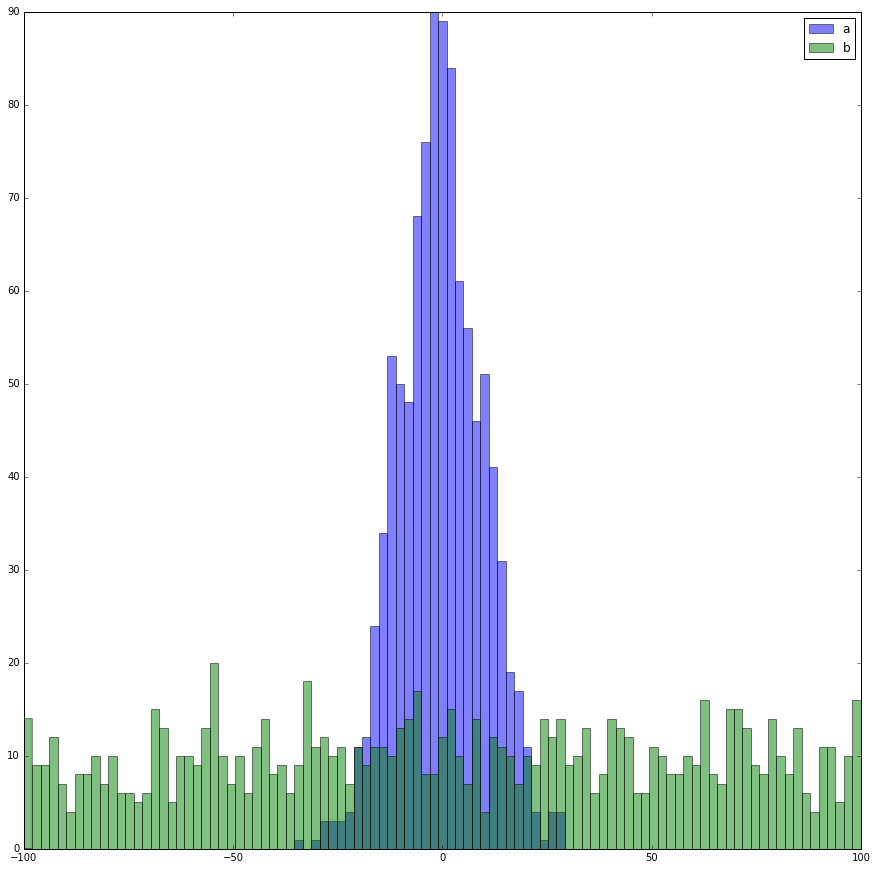

In [10]:
bins = np.linspace(-100, 100, 100)
plt.hist(a, bins, alpha=0.5, label='a')
plt.hist(b, bins, alpha=0.5, label='b')
plt.legend(loc='upper right')

## 3d functions
f(x, y) = z

### Trisurf

In [11]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
X, Y = X.ravel(), Y.ravel()
Z = [a*b for a,b in zip(X, Y)]

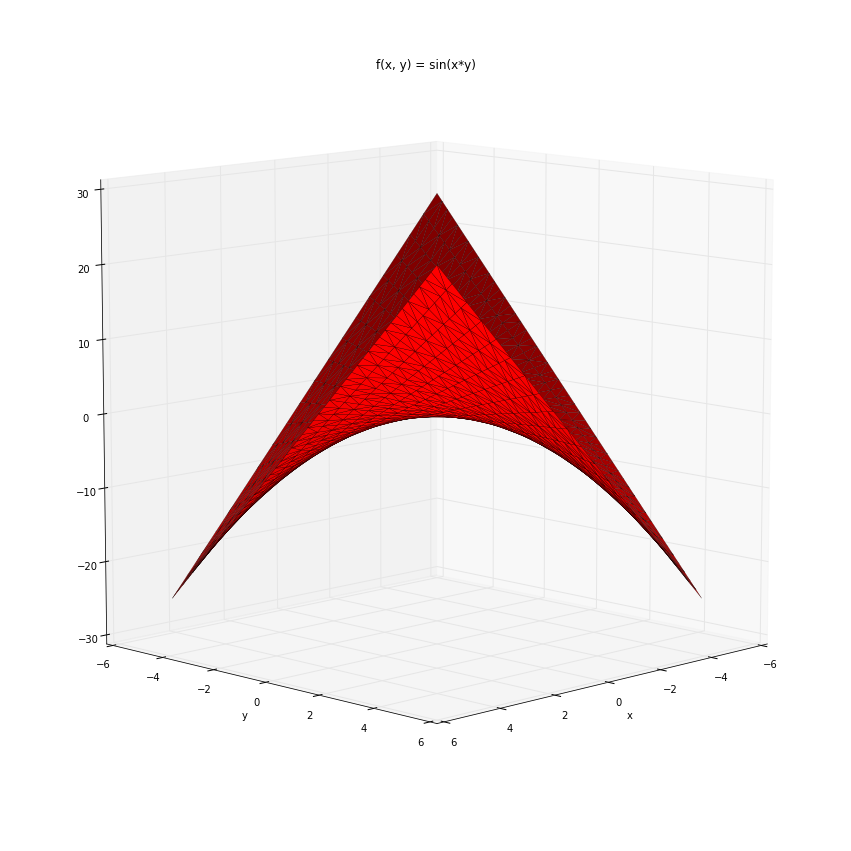

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("f(x, y) = sin(x*y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(10, 45)
ax.plot_trisurf(X, Y, Z, linewidth=0.2, antialiased=True, color="red")

### Wireframe

In [13]:
x = np.linspace(0, 10, 20)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
Z = np.exp(X) * Y**2

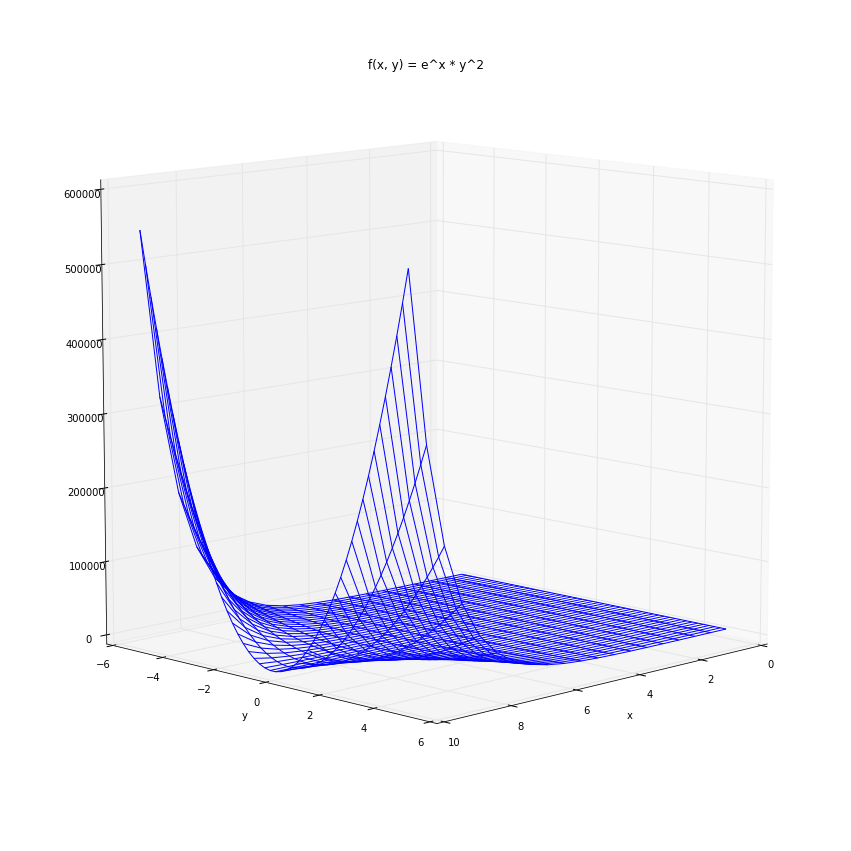

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("f(x, y) = e^x * y^2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(10, 45)
ax.plot_wireframe(X, Y, Z, color='blue', antialiased=True)

### Surface

In [15]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = np.cos(np.sqrt(X**2 + Y**2))

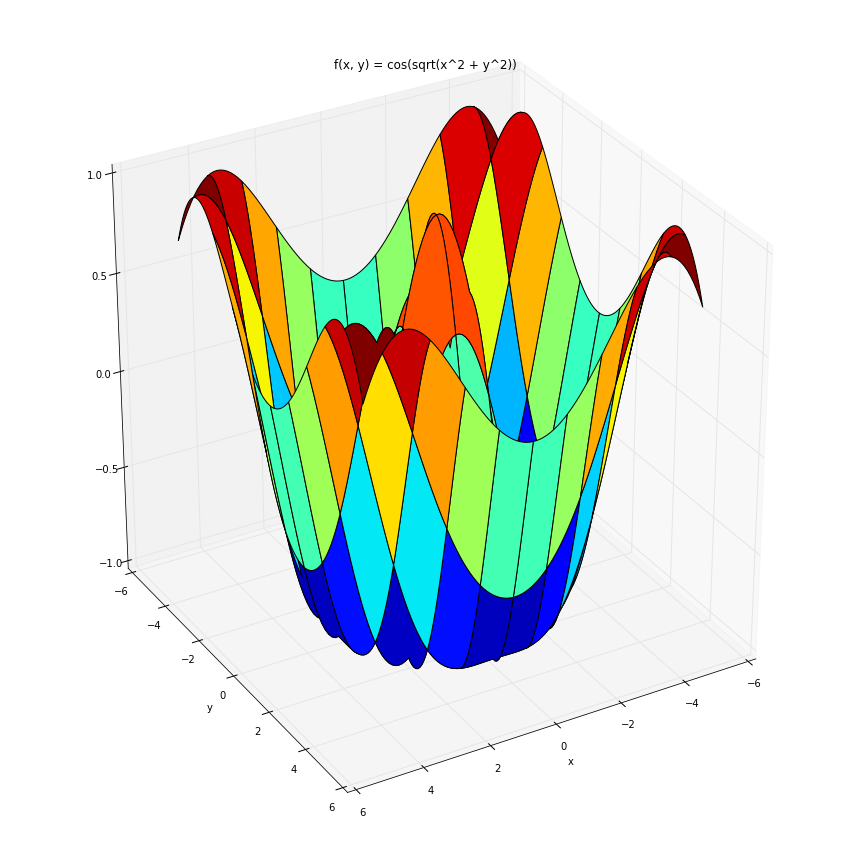

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("f(x, y) = cos(sqrt(x^2 + y^2))")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 60)
ax.plot_surface(X, Y, Z, cmap='jet', antialiased=True)

### 3D scatterplots

In [17]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
# X, Y = X.flatten(), Y.flatten()
Z = np.cos(np.sqrt(X**2 + Y**2))

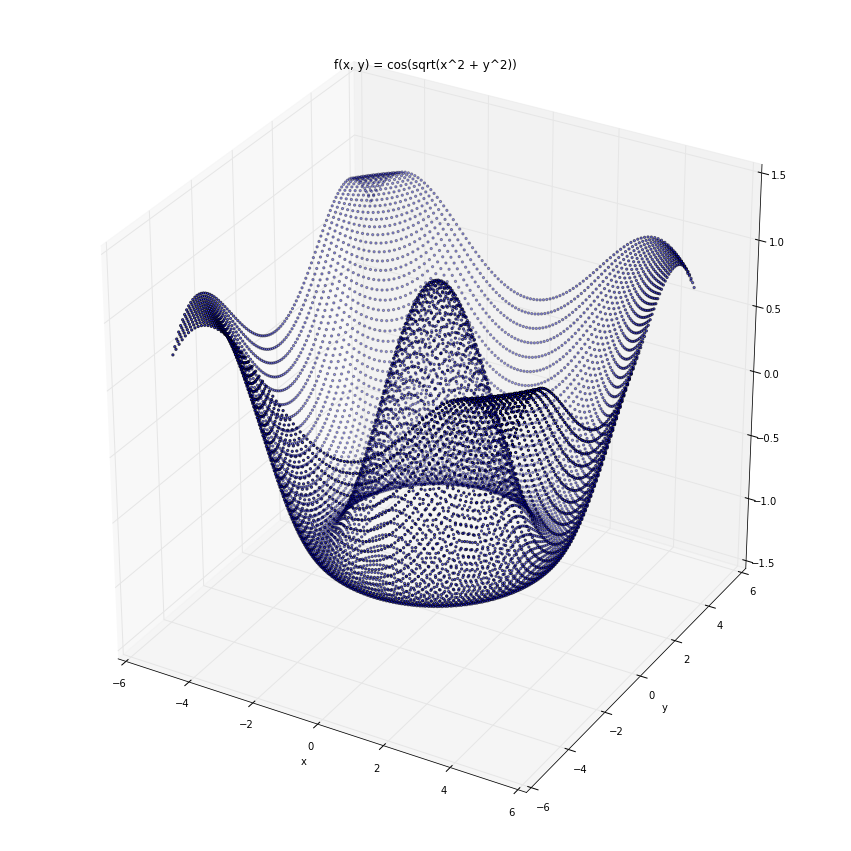

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("f(x, y) = cos(sqrt(x^2 + y^2))")
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.view_init(45, 45)
ax.scatter(X, Y, Z, c='blue', s=5, marker='o')

## Contours

In [19]:
a = np.linspace(-10,10, 100)
x, y = np.meshgrid(a, a)
r = np.sqrt(x**2 + y**2)
c = r <= 2

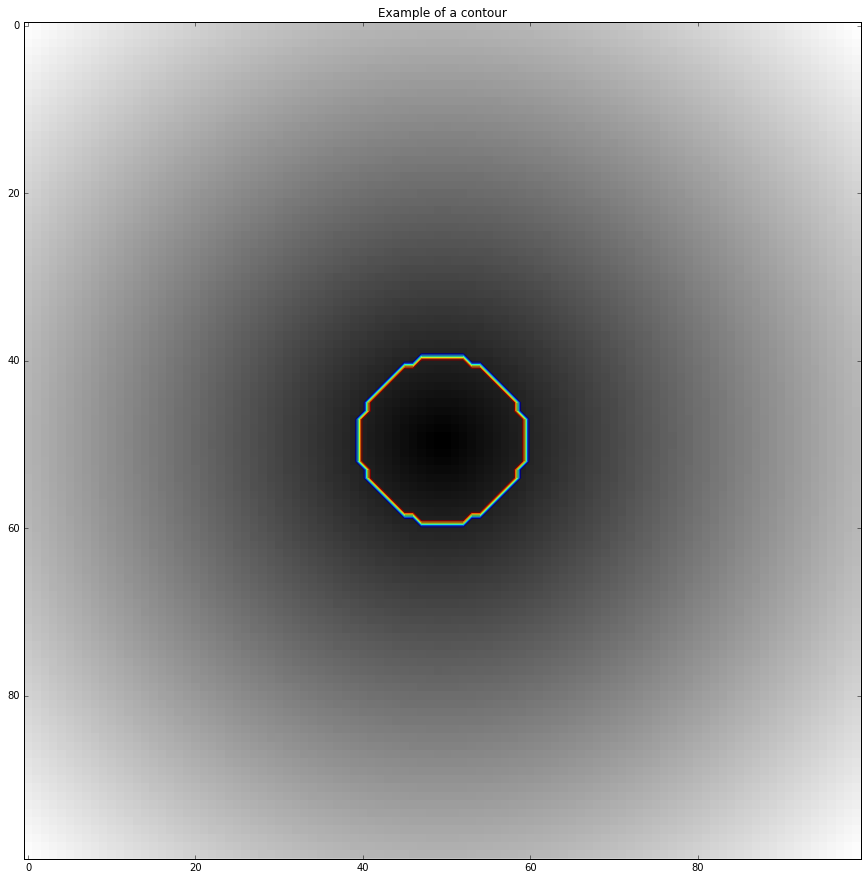

In [20]:
plt.title("Example of a contour")
plt.imshow(r, interpolation='none', cmap='gray')
plt.contour(c, interpolation='none')

## Subplots

In [21]:
img1 = np.arange(10000).reshape(100,100)

a = np.linspace(-10,10, 100)
x, y = np.meshgrid(a, a)
img2 = np.sqrt(x**2 + y**2)

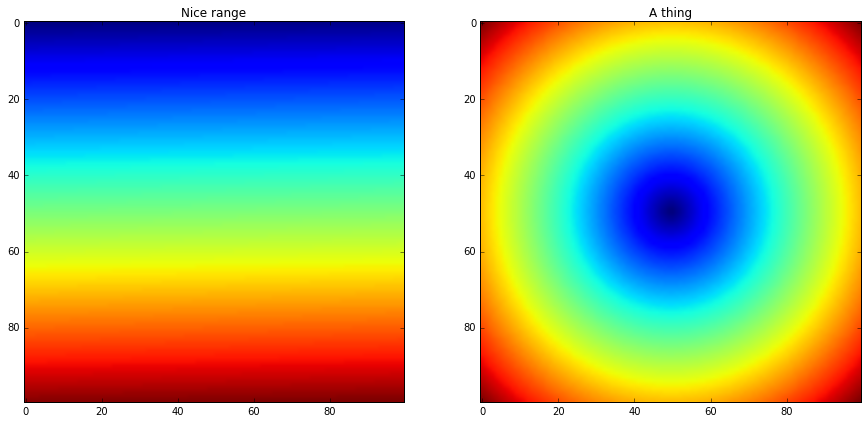

In [22]:
figs = [(img1, "Nice range"),
        (img2, "A thing")]

_, axes = plt.subplots(nrows=1, ncols=len(figs))

for axe, fig in zip(axes, figs):
    axe.set_title(fig[1])
    axe.imshow(fig[0])